In [1]:
import csv

In [2]:
import numpy as np

In [3]:
from sklearn.svm import SVR

In [4]:
import matplotlib.pyplot as plt

In [5]:
dates = []
prices = []

In [6]:
def get_data(filename):
    with open(filename, 'r') as csvfile:
        data = csv.reader(csvfile)
        next(data)
        for row in data:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[4]))
    return

In [7]:
def predict_price(dates, prices, x):
    # convert the matrix to [n][1]
    dates = np.reshape(dates, (len(dates), 1))
    
    svr_lin = SVR(kernel = 'linear', C = 1e3, gamma = 'auto')
    svr_poly = SVR(kernel = 'poly', C = 1e3, degree = 2, gamma = 'auto')
    svr_rbf = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates, prices, color = 'black', label = 'Data')
    
    plt.plot(dates, svr_lin.predict(dates), color = 'red', label = 'Linear Model')
    plt.plot(dates, svr_poly.predict(dates), color = 'green', label = 'Polynomial Model')
    plt.plot(dates, svr_rbf.predict(dates), color = 'blue', label = 'SVR Model')
    
    plt.xlabel('Date')
    plt.ylabel("Price")
    plt.title("Support Vector Regression (SVR)")
    plt.legend()
    plt.show()
    
    return svr_lin.predict(np.array(x).reshape(-1,1))[0], svr_poly.predict(np.array(x).reshape(-1,1))[0], svr_rbf.predict(np.array(x).reshape(-1,1))[0]

In [8]:
get_data('GOOG.csv')
print ("Dates- ", dates)
print ("Prices- ", prices)

Dates-  [26, 25, 24, 23, 22, 19, 18, 17, 16, 12, 11, 10, 9, 8, 5, 4, 3, 2, 1]
Prices-  [705.07, 705.75, 699.56, 695.85, 706.46, 700.91, 697.35, 708.4, 691.0, 682.4, 683.11, 684.12, 678.11, 682.74, 683.57, 708.01, 726.95, 764.65, 752.0]


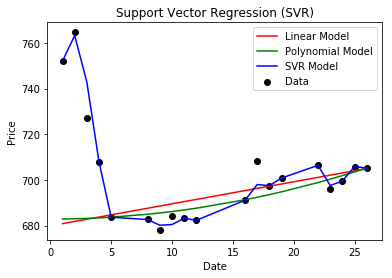

The Stock Open Price: 
Linear Kernel: $ 707.8650000000664
Polynomial Kernel: $ 710.6193087482044
RBF Kernel: $ 689.2622059860439


In [9]:
predicted_price = predict_price(dates, prices, 29)
print("The Stock Open Price: ")
print("Linear Kernel: $", str(predicted_price[0]))
print("Polynomial Kernel: $", str(predicted_price[1]))
print("RBF Kernel: $", str(predicted_price[2]))